blimpy.io.base_reader WARNING  Setting data limit != 1GB, please handle with care!
blimpy.io.base_reader WARNING  Setting data limit != 1GB, please handle with care!
[0. 0. 0. ... 0. 0. 0.]


'for i in range(16):\n    for j in range(end_ind):\n        if (unspliced_data[i,0,j]/spliced_data[i, 0,j]) != 1.0:\n            print("{0}\t{1}\t{2}".format(unspliced_data[0,0,i], spliced_data[0,0,i], unspliced_data[0,0,i]/spliced_data[0,0,i]))'

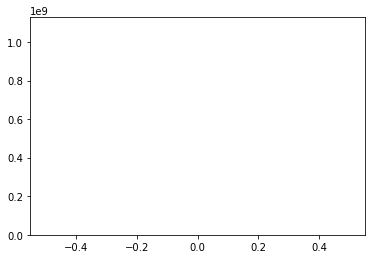

In [39]:
#the purpose of this notebook is to compare the data in an 
#unspliced filterbank with one that has had splice2 run on it
#to determine if splice2 is introducing small differences due 
#to bit depth issues

#Ellie White 5 Feb. 2021

import numpy as np
import pylab as plt
import pandas as pd
from blimpy import Waterfall
from astropy.io import ascii

unspliced = Waterfall('/home/ewhite/splice2_test/blc00_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.fil', max_load=4.1)
unspliced_data = unspliced.data

spliced = Waterfall('/home/ewhite/splice2_test/spliced_guppi_59046_80036_DIAG_VOYAGER-1_0011_2nodes.rawspec.0000.fil', max_load=8.1)
end_ind = unspliced_data.shape[2]
spliced_data = spliced.data[:,:,0:end_ind]

unspliced_dat_array = np.concatenate((unspliced_data[0,0], unspliced_data[1,0],unspliced_data[2,0], unspliced_data[3,0], \
                                      unspliced_data[4,0], unspliced_data[5,0], unspliced_data[6,0], unspliced_data[7,0], \
                                      unspliced_data[8,0], unspliced_data[9,0], unspliced_data[10,0], unspliced_data[11,0], \
                                      unspliced_data[12,0], unspliced_data[13,0], unspliced_data[14,0], unspliced_data[15,0]))

spliced_dat_array = np.concatenate((spliced_data[0,0], spliced_data[1,0], spliced_data[2,0], spliced_data[3,0], \
                                    spliced_data[4,0], spliced_data[5,0], spliced_data[6,0], spliced_data[7,0], \
                                    spliced_data[8,0], spliced_data[9,0], spliced_data[10,0], spliced_data[11,0], \
                                    spliced_data[12,0], spliced_data[13,0], spliced_data[14,0], spliced_data[15,0]))

print(unspliced_dat_array - spliced_dat_array)

plt.hist(unspliced_dat_array - spliced_dat_array, bins=500)
plt.savefig('/home/ewhite/voyager_histograms/uf-sf.png', dpi=300)
plt.show()

#print(unspliced_data[0,0])

#print("Unspliced\tSpliced\tU/S")

'''for i in range(16):
    for j in range(end_ind):
        if (unspliced_data[i,0,j]/spliced_data[i, 0,j]) != 1.0:
            print("{0}\t{1}\t{2}".format(unspliced_data[0,0,i], spliced_data[0,0,i], unspliced_data[0,0,i]/spliced_data[0,0,i]))'''

In [ ]:
import pylab as plt
import pandas as pd
from astropy.io import ascii

#read in the data from the unspliced dat file
ufud = ascii.read('/home/ewhite/splice2_test/blc00_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.dat')

ufud = ufud.to_pandas()
ufud = ufud.apply(pd.to_numeric)

ufud.columns = ['Top_Hit_#', 'Drift_Rate', 'SNR', 'Uncorrected_Frequency', 'Corrected_Frequency', 'Index', \
                'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 'Full_number_of_hits']

ufud.sort_values(by='Uncorrected_Frequency', ascending=False, inplace=True)
pd.set_option('display.max_rows', None)

#read in the data from the spliced dat file
sfd = ascii.read('/home/ewhite/splice2_test/spliced_guppi_59046_80036_DIAG_VOYAGER-1_0011_2nodes.rawspec.0000.dat')
#sfd = ascii.read('/home/ewhite/splice2_test/newfile/blc00_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.dat')
sfd = sfd.to_pandas()
sfd = sfd.apply(pd.to_numeric)
sfd.columns = ['Top_Hit_#', 'Drift_Rate', 'SNR', 'Uncorrected_Frequency', 'Corrected_Frequency', 'Index', \
               'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 'Full_number_of_hits']

sfd.sort_values('Uncorrected_Frequency', ascending=False, inplace=True)
#print(sfd['Corrected_Frequency'].size)

ufud_ind = []
sfd_ind = []

for i in range(ufud['Uncorrected_Frequency'].size):
    ufud_ind.append(ufud.index.values[i])
    sfd_ind.append(sfd.index.values[i])

outfile = open('ufud1-vs-ufud2.txt', 'w')
outfile.write("UFUD\t\t\tSFD\t\t\tUFUD/SFD\n")
print("UFUD\t\t\tSFD\t\t\tUFUD/SFD\n")

for j in range(ufud['Uncorrected_Frequency'].size):
    print("{0}\t\t{1}\t\t{2}".format(ufud['SNR'][ufud_ind[j]], sfd['SNR'][sfd_ind[j]], ufud['SNR'][ufud_ind[j]]-sfd['SNR'][sfd_ind[j]]))
    outfile.write("{0}\t\t{1}\t\t{2}\n".format(ufud['SNR'][ufud_ind[j]], sfd['SNR'][sfd_ind[j]], ufud['SNR'][ufud_ind[j]]/sfd['SNR'][sfd_ind[j]]))
    
outfile.close()

plt.hist(ufud['SNR']-sfd['SNR'], bins=177)
plt.savefig('/home/ewhite/voyager_histograms/ufud-sfd.png', dpi=300)
plt.show()

#print("{0}, {1}".format(ufud['Corrected_Frequency'][0], ufud['Corrected_Frequency'][176]))